In [36]:
# !pip install dython

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dython import nominal

In [21]:
# Cargar los datos del clima
df_vuelos =pd.read_csv('/content/data_vuelos/Flight Delays Data.csv')
#Muestra las 10 primeras filas del dataset
df_vuelos.head(10)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,4,19,5,DL,11433,13303,837,-3.0,0.0,1138,1.0,0.0,0.0
1,2013,4,19,5,DL,14869,12478,1705,0.0,0.0,2336,-8.0,0.0,0.0
2,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0.0,0.0
3,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1.0,0.0
4,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0.0,0.0
5,2013,4,19,5,DL,10397,15016,1726,-1.0,0.0,1818,-19.0,0.0,0.0
6,2013,4,19,5,DL,15016,10397,1900,0.0,0.0,2133,-1.0,0.0,0.0
7,2013,4,19,5,DL,10397,14869,2145,15.0,1.0,2356,24.0,1.0,0.0
8,2013,4,19,5,DL,10397,10423,2157,33.0,1.0,2333,34.0,1.0,0.0
9,2013,4,19,5,DL,11278,10397,1900,323.0,1.0,2055,322.0,1.0,0.0


In [22]:
df_vuelos.shape

(1006472, 14)

In [23]:
columnas = []
conteo_valores_unicos = []
valores_unicos = []
tipo_dato= []
conteo_nulos =[]
# Iterar a través de las columnas del DataFrame
for columna in df_vuelos.columns:
    valores_unicos_columna = df_vuelos[columna].unique()

    columnas.append(columna)
    conteo_valores_unicos.append(len(valores_unicos_columna))
    valores_unicos.append(valores_unicos_columna)
    tipo_dato.append(df_vuelos[columna].dtypes)
    conteo_nulos.append(df_vuelos[columna].isnull().sum())
informacion_columnas = pd.DataFrame({
    'Campo': columnas,
    'tipo_dato':tipo_dato,
    'Número_Valores_Unicos': conteo_valores_unicos,
    'conteo_nulos':conteo_nulos,
    'Valores_Unicos': valores_unicos
})

informacion_columnas.head(informacion_columnas.shape[0])

,Campo,tipo_dato,Número_Valores_Unicos,conteo_nulos,Valores_Unicos
0,Year,int64,1,0,[2013]
1,Month,int64,3,0,"[4, 5, 6]"
2,DayofMonth,int64,31,0,"[19, 20, 18, 16, 17, 21, 22, 23, 24, 25, 26, 2..."
3,DayOfWeek,int64,7,0,"[5, 6, 4, 2, 3, 7, 1]"
4,Carrier,object,16,0,"[DL, AA, EV, B6, F9, FL, HA, MQ, 9E, AS, US, U..."
5,OriginAirportID,int64,70,0,"[11433, 14869, 14057, 15016, 11193, 10397, 112..."
6,DestAirportID,int64,70,0,"[13303, 12478, 14869, 11433, 12892, 15016, 103..."
7,CRSDepTime,int64,1212,0,"[837, 1705, 600, 1630, 1615, 1726, 1900, 2145,..."
8,DepDelay,float64,783,11809,"[-3.0, 0.0, -4.0, 28.0, -6.0, -1.0, 15.0, 33.0..."
9,DepDel15,float64,3,11809,"[0.0, 1.0, nan]"


In [24]:
informacion_columnas['tipo_dato'].value_counts()

int64      8
float64    5
object     1
Name: tipo_dato, dtype: int64

In [25]:
# Ahora vamos a transformar los tipos de datos de las variables del dataset de vuelos

#Transformamos los números de identificación a tipo string
df_vuelos['OriginAirportID'] = df_vuelos['OriginAirportID'].astype(str)
df_vuelos['DestAirportID'] = df_vuelos['DestAirportID'].astype(str)

# Transformamos las variables a tipo booleano cuando el 1 o 0 indican verdadero o falso
df_vuelos['DepDel15'] = df_vuelos['DepDel15'].astype(bool)
df_vuelos['ArrDel15'] = df_vuelos['ArrDel15'].astype(bool)
df_vuelos['Cancelled'] = df_vuelos['Cancelled'].astype(bool)

In [26]:
df_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006472 entries, 0 to 1006471
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Year             1006472 non-null  int64  
 1   Month            1006472 non-null  int64  
 2   DayofMonth       1006472 non-null  int64  
 3   DayOfWeek        1006472 non-null  int64  
 4   Carrier          1006472 non-null  object 
 5   OriginAirportID  1006472 non-null  object 
 6   DestAirportID    1006472 non-null  object 
 7   CRSDepTime       1006472 non-null  int64  
 8   DepDelay         994663 non-null   float64
 9   DepDel15         1006472 non-null  bool   
 10  CRSArrTime       1006472 non-null  int64  
 11  ArrDelay         993999 non-null   float64
 12  ArrDel15         1006472 non-null  bool   
 13  Cancelled        1006472 non-null  bool   
dtypes: bool(3), float64(2), int64(6), object(3)
memory usage: 87.3+ MB


In [27]:
# Como las horas de las mediciones metereológicas no son exactamente las mismas
#a las horas de despegue de los vuelos haremos una aproximación a la hora más cercana

# Tranformamos la variable del data frame de vuelos
df_vuelos['CRSDepTime'] = df_vuelos['CRSDepTime'].apply(lambda x: x/100)
df_vuelos['CRSDepTime'] = df_vuelos['CRSDepTime'].round(0)
df_vuelos['CRSDepTime']

0           8.0
1          17.0
2           6.0
3          16.0
4          16.0
           ... 
1006467     8.0
1006468    18.0
1006469    22.0
1006470    12.0
1006471    10.0
Name: CRSDepTime, Length: 1006472, dtype: float64

### 3.2 Tratamiento de valores faltanes

In [28]:
# Identificamos la cantidad de valores nulos en cada uno de los datasets
df_vuelos.isnull().sum().divide(len(df_vuelos)).multiply(100)

Year               0.000000
Month              0.000000
DayofMonth         0.000000
DayOfWeek          0.000000
Carrier            0.000000
OriginAirportID    0.000000
DestAirportID      0.000000
CRSDepTime         0.000000
DepDelay           1.173306
DepDel15           0.000000
CRSArrTime         0.000000
ArrDelay           1.239279
ArrDel15           0.000000
Cancelled          0.000000
dtype: float64

In [29]:
# Elimanos las observaciones que tienen nulos en la variables DepDelay y ArrDelay
# dado que esta es la variable y el % de faltantes es bajo

df_vuelos.dropna(subset=['DepDelay'], inplace=True)
df_vuelos.dropna(subset=['ArrDelay'], inplace=True)
df_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993999 entries, 0 to 1006471
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             993999 non-null  int64  
 1   Month            993999 non-null  int64  
 2   DayofMonth       993999 non-null  int64  
 3   DayOfWeek        993999 non-null  int64  
 4   Carrier          993999 non-null  object 
 5   OriginAirportID  993999 non-null  object 
 6   DestAirportID    993999 non-null  object 
 7   CRSDepTime       993999 non-null  float64
 8   DepDelay         993999 non-null  float64
 9   DepDel15         993999 non-null  bool   
 10  CRSArrTime       993999 non-null  int64  
 11  ArrDelay         993999 non-null  float64
 12  ArrDel15         993999 non-null  bool   
 13  Cancelled        993999 non-null  bool   
dtypes: bool(3), float64(3), int64(5), object(3)
memory usage: 93.8+ MB


In [30]:
columnas = []
conteo_valores_unicos = []
valores_unicos = []
tipo_dato= []
conteo_nulos =[]
# Iterar a través de las columnas del DataFrame
for columna in df_vuelos.columns:
    valores_unicos_columna = df_vuelos[columna].unique()

    columnas.append(columna)
    conteo_valores_unicos.append(len(valores_unicos_columna))
    valores_unicos.append(valores_unicos_columna)
    tipo_dato.append(df_vuelos[columna].dtypes)
    conteo_nulos.append(df_vuelos[columna].isnull().sum())
informacion_columnas = pd.DataFrame({
    'Campo': columnas,
    'tipo_dato':tipo_dato,
    'Número_Valores_Unicos': conteo_valores_unicos,
    'conteo_nulos':conteo_nulos,
    'Valores_Unicos': valores_unicos
})

informacion_columnas.head(informacion_columnas.shape[0])

,Campo,tipo_dato,Número_Valores_Unicos,conteo_nulos,Valores_Unicos
0,Year,int64,1,0,[2013]
1,Month,int64,3,0,"[4, 5, 6]"
2,DayofMonth,int64,31,0,"[19, 20, 18, 16, 17, 21, 22, 23, 24, 25, 26, 2..."
3,DayOfWeek,int64,7,0,"[5, 6, 4, 2, 3, 7, 1]"
4,Carrier,object,16,0,"[DL, AA, EV, B6, F9, FL, HA, MQ, 9E, AS, US, U..."
5,OriginAirportID,object,70,0,"[11433, 14869, 14057, 15016, 11193, 10397, 112..."
6,DestAirportID,object,70,0,"[13303, 12478, 14869, 11433, 12892, 15016, 103..."
7,CRSDepTime,float64,25,0,"[8.0, 17.0, 6.0, 16.0, 19.0, 21.0, 22.0, 15.0,..."
8,DepDelay,float64,780,0,"[-3.0, 0.0, -4.0, 28.0, -6.0, -1.0, 15.0, 33.0..."
9,DepDel15,bool,2,0,"[False, True]"


In [31]:
df_vuelos.describe(include='all')

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,993999.0,993999.000000,993999.000000,993999.000000,993999,993999,993999,993999.000000,993999.000000,993999,993999.000000,993999.000000,993999,993999
unique,NaN,NaN,NaN,NaN,16,70,70,NaN,NaN,2,NaN,NaN,2,1
top,NaN,NaN,NaN,NaN,WN,10397,10397,NaN,NaN,False,NaN,NaN,False,False
freq,NaN,NaN,NaN,NaN,174403,51439,51506,NaN,NaN,788983,NaN,NaN,777765,993999
mean,2013.0,4.847576,15.385621,3.906850,NaN,NaN,NaN,13.139695,11.357233,NaN,1504.010957,7.651851,NaN,NaN
std,0.0,0.765565,8.812808,1.990001,NaN,NaN,NaN,4.777714,38.394849,NaN,500.995176,41.311308,NaN,NaN
min,2013.0,4.000000,1.000000,1.000000,NaN,NaN,NaN,0.000000,-60.000000,NaN,1.000000,-94.000000,NaN,NaN
25%,2013.0,4.000000,8.000000,2.000000,NaN,NaN,NaN,9.000000,-4.000000,NaN,1116.000000,-12.000000,NaN,NaN
50%,2013.0,5.000000,15.000000,4.000000,NaN,NaN,NaN,13.000000,-1.000000,NaN,1527.000000,-3.000000,NaN,NaN
75%,2013.0,5.000000,23.000000,6.000000,NaN,NaN,NaN,17.000000,10.000000,NaN,1921.000000,11.000000,NaN,NaN


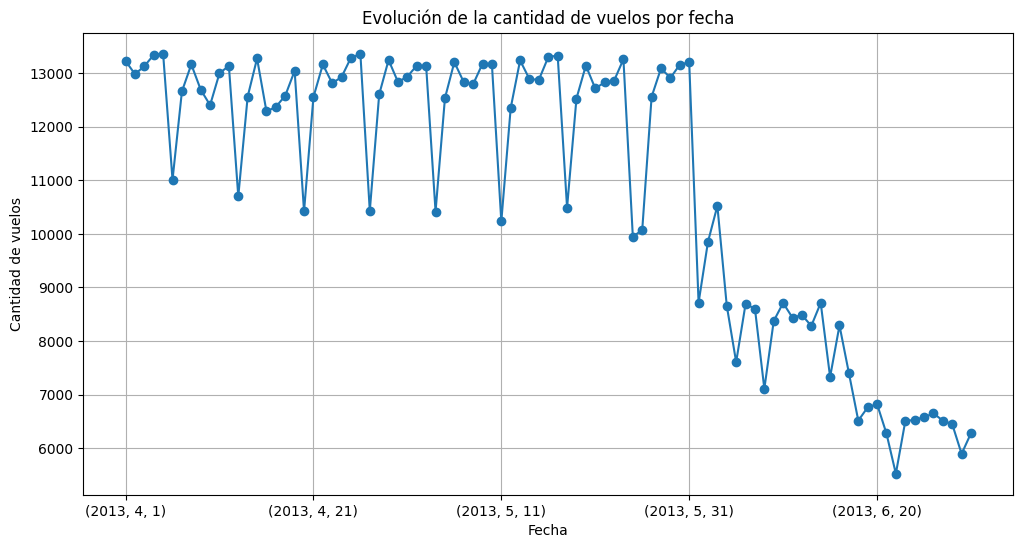

In [32]:
# Agrupar y contar la cantidad de vuelos por mes y día
vuelos_por_fecha = df_vuelos.groupby(['Year', 'Month', 'DayofMonth']).size()

# Crear una figura y una gráfica de líneas
plt.figure(figsize=(12, 6))
vuelos_por_fecha.plot(marker='o', linestyle='-')

# Personalizar la gráfica
plt.title('Evolución de la cantidad de vuelos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de vuelos')
plt.grid(True)

# Mostrar la gráfica
plt.show()


In [33]:
# Calcular el número de vuelos por 'OriginAirportID'
vuelos_por_origen = df_vuelos.groupby('OriginAirportID')['Year'].count()

# Ordenar en orden descendente para encontrar los aeropuertos de origen más ocupados
vuelos_por_origen = vuelos_por_origen.sort_values(ascending=False)

print("Número de vuelos por aeropuerto de origen:")
print(vuelos_por_origen)

Número de vuelos por aeropuerto de origen:
OriginAirportID
10397    51439
13930    49583
12892    45392
11298    42857
11292    33589
         ...  
13931     3368
14307     3341
14730     3330
12954     3288
10299     2863
Name: Year, Length: 70, dtype: int64


In [19]:
# Calcular los principales destinos por 'DestAirportID'
destinos_principales = df_vuelos.groupby('DestAirportID')['Year'].count()

# Ordenar en orden descendente para encontrar los destinos más populares
destinos_principales = destinos_principales.sort_values(ascending=False)

print("Principales destinos por aeropuerto de destino:")
print(destinos_principales)

Principales destinos por aeropuerto de destino:
DestAirportID
10397.0    33474
11298.0    27270
13930.0    23388
12892.0    20217
11292.0    17036
           ...  
13891.0     1937
12954.0     1854
14307.0     1834
14570.0     1565
10299.0     1451
Name: Year, Length: 70, dtype: int64


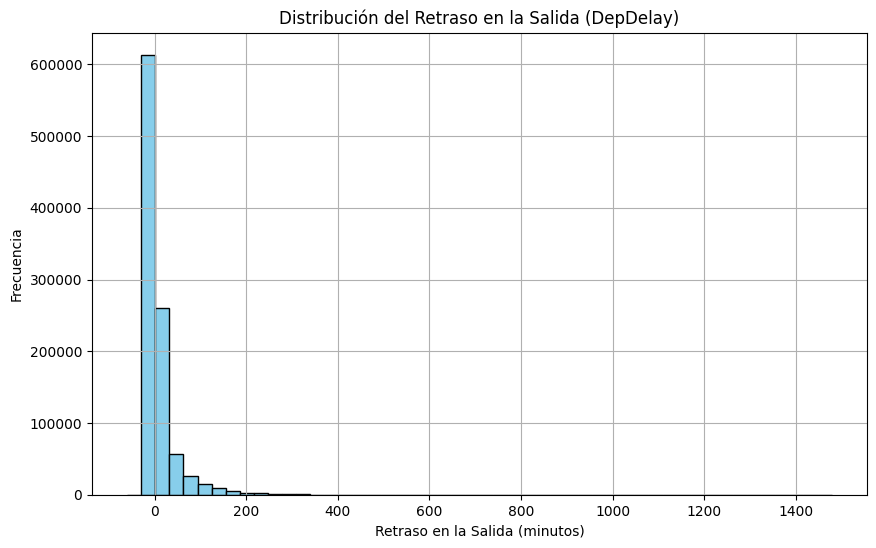

In [39]:
import matplotlib.pyplot as plt

# Selecciona la columna 'DepDelay' del DataFrame 'df_vuelos'
dep_delay = df_vuelos['DepDelay']

# Crea un histograma
plt.figure(figsize=(10, 6))
plt.hist(dep_delay, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución del Retraso en la Salida (DepDelay)')
plt.xlabel('Retraso en la Salida (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)

# Muestra el histograma
plt.show()

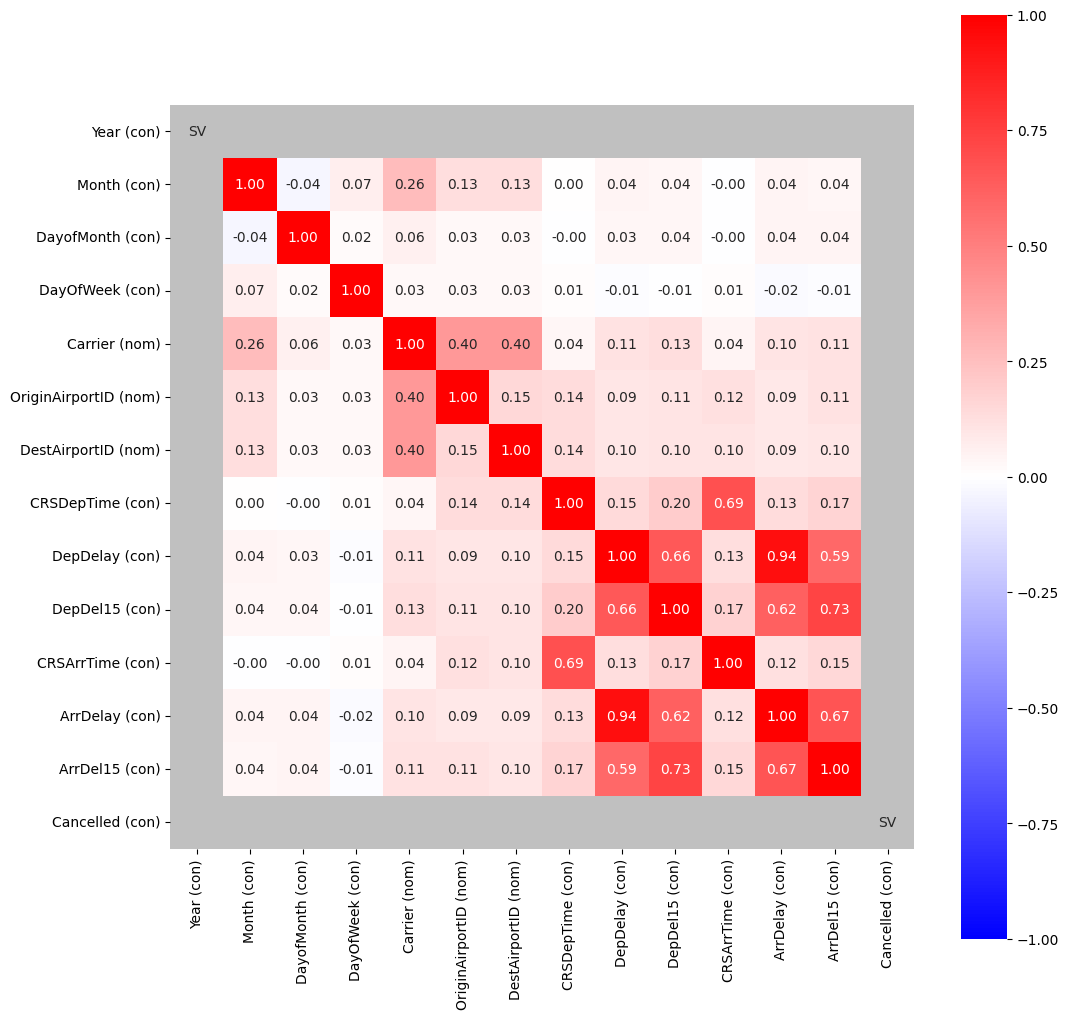

{'corr':                        Year (con)  Month (con)  DayofMonth (con)  \
 Year (con)                    0.0     0.000000          0.000000   
 Month (con)                   0.0     1.000000         -0.038775   
 DayofMonth (con)              0.0    -0.038775          1.000000   
 DayOfWeek (con)               0.0     0.066491          0.020543   
 Carrier (nom)                 0.0     0.260257          0.056037   
 OriginAirportID (nom)         0.0     0.126753          0.027397   
 DestAirportID (nom)           0.0     0.126218          0.027313   
 CRSDepTime (con)              0.0     0.000476         -0.000088   
 DepDelay (con)                0.0     0.041437          0.034943   
 DepDel15 (con)                0.0     0.036367          0.038948   
 CRSArrTime (con)              0.0    -0.004464         -0.001003   
 ArrDelay (con)                0.0     0.043414          0.042940   
 ArrDel15 (con)                0.0     0.038547          0.042992   
 Cancelled (con)          

In [38]:
nominal.associations(df_vuelos,figsize=(12,12),mark_columns=True, cmap = 'bwr')